In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
import sys
import pandas as pd
import pickle
from scipy import stats


from Doublet_Quantifier.curvefit import *
from Doublet_Quantifier.models import *


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
sys.path.append('/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/functions')
from plotting_tools import *

In [4]:
mypath = '/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/'
dfs = []
temps = [1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400]

for temp in temps:
    with open(mypath + "diamondback-data/pickle_files/parameters/t"+ str(temp) + "_parameter_df.pkl", "rb") as f:
        df = pickle.load(f)
        df["temp"] = temp * np.ones(len(df))
        dfs.append(df[df['clouds'] != 10].copy(deep=False).reset_index(drop=True))

master_df = pd.concat(dfs, ignore_index=True)
[T1400, T1500, T1600, T1700, T1800, T1900, T2000, T2100, T2200, T2300, T2400] = dfs

del df

In [5]:
# lists of values 

gravities = [3.5, 4.0, 4.5, 5.0, 5.5]
clouds = [1,2,3,4,8]


In [6]:
# Fili15 spectral type to temperature conversion
# integer values 6-29 correspond to spectral types M6-T9
# L0:10, L1:11, L2:12, L3:13, L4:14, L5:15, L6:16, L7:17, L8:18, L9:19
Teff = lambda x: 4.747e3 -7.005e2*x + 1.155e2*(x**2) - 1.191e1*(x**3) +6.318e-1*(x**4) -1.606e-2*(x**5) +1.546e-4*(x**6)


In [7]:
# defing the colors and colorbars for the logg and temp values 
logg_num = [3.5, 4, 4.5, 5, 5.5]
logg_ticks = ['Less\ndense', '4', '4.5', '5', 'More\ndense']
logg_bounds = [3.25, 3.75, 4.25, 4.75, 5.25, 5.75]

temp_num =   [ 1400,  1600, 1800, 2000, 2200, 2400]
temp_ticks = ['1400 K', '1600 K', '1800 K', '2000 K', '2200 K','2400 K']


spec_types = ["L7", "L6", "L5", "L4", "L3", "L2", "L1", "L0", " M9"]
spec_ticks = [Teff(type) for type in range(17, 9-1, -1)]

temp_bounds = [1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150, 2250, 2350, 2450]

bw_cmap = plt.cm.binary
norm_bw = mpl.colors.BoundaryNorm(logg_bounds, logg_colors.N, extend='min')


rainbow = plt.cm.rainbow
norm_temp = mpl.colors.BoundaryNorm(temp_bounds, rainbow.N, extend='neither')


def logg_bw_colorbar(fig, cax = None, ax = None, orientation='vertical',
                 shrink=1.0, aspect=20, pad=.14, fontsize = 12):

    cbar = fig.colorbar(pl.cm.ScalarMappable(norm=norm_bw, cmap=bw_cmap),
                cax=cax, ax = ax, orientation= orientation,
                extend='neither', spacing='proportional',
                shrink=shrink, aspect=aspect, pad=pad)
    cbar.ax.yaxis.set_ticks(logg_num)
    cbar.ax.yaxis.set_ticklabels(logg_ticks, fontsize = fontsize)

    return cbar



def temp_colorbar(fig, cax = None, ax = None, orientation='vertical',
                  shrink=1.0, aspect=20, pad=.14, fontsize = 12):
    cbar = fig.colorbar(pl.cm.ScalarMappable(norm=norm_temp, cmap=rainbow),
                cax=cax, ax = ax, orientation= orientation,
                extend='neither', spacing='proportional',
                shrink=shrink, aspect=aspect, pad=pad)
    # Add ticks and labels to both sides of the color bar
    cbar.ax.yaxis.set_ticks_position('both')

    # Set ticks and labels for the left side
    left_ticks = spec_ticks
    left_tick_labels = spec_types
    cbar.ax.yaxis.set_ticks(left_ticks)
    cbar.ax.yaxis.set_ticklabels(left_tick_labels, fontsize = fontsize)
    cbar.ax.yaxis.set_label_position('left')
    #cbar.set_label("Spectral Type", fontsize = fontsize, rotation = -90, labelpad=0)

    # Create secondary axis for the right side ticks
    cbar_ax_secondary = cbar.ax.twinx()
    cbar_ax_secondary.set_ylim(cbar.ax.get_ylim())

    # Set ticks and labels for the right side
    right_ticks = temp_num 
    right_tick_labels = temp_num
    cbar_ax_secondary.set_yticks(right_ticks)
    cbar_ax_secondary.set_yticklabels(right_tick_labels, fontsize = fontsize -1)
    cbar_ax_secondary.yaxis.set_label_position('right')
    #cbar_ax_secondary.set_ylabel("Temperature (K)", fontsize = fontsize, labelpad=0)
    

    return cbar
    

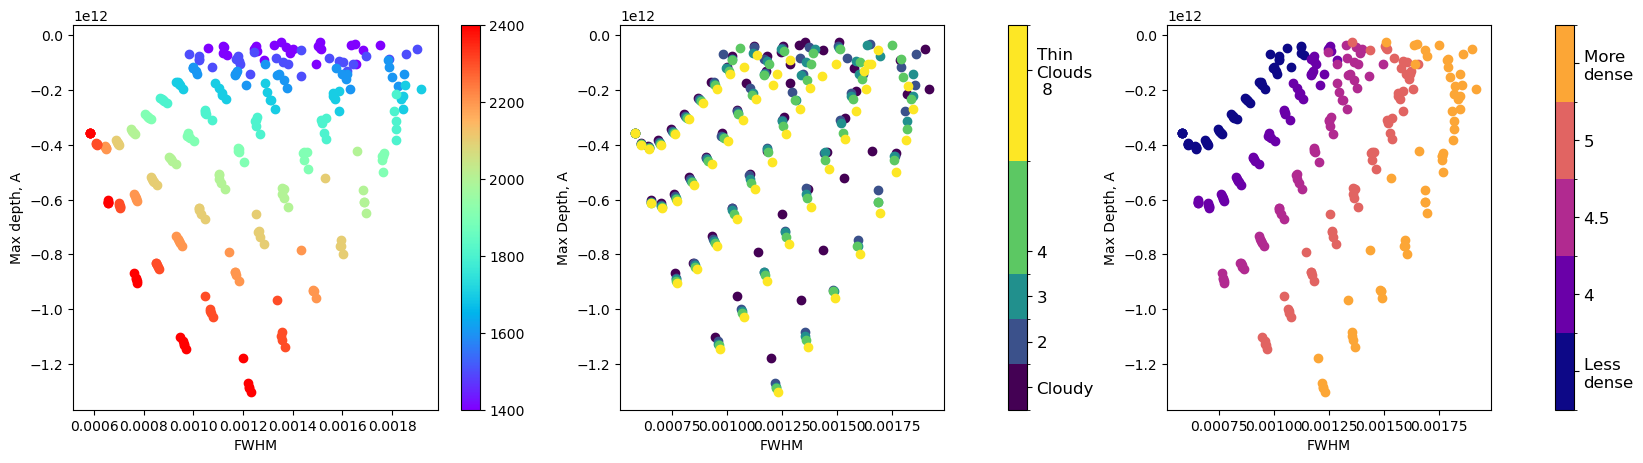

In [8]:
## shape of doublet plots: various color coding

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
ax1, ax2, ax3 = axs


# colored by temperature
cmap = plt.cm.rainbow
norm = mcolors.Normalize(vmin=min(temps), vmax=max(temps))


for temp in temps:
    mask = master_df['temp'] == temp
    # mask = mask & (master_df['logg'] >= 4) & (master_df['logg'] <= 5)
    #mask = mask & (master_df['clouds'] <= 3)
    color = cmap(norm(temp))
    
    ax1.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color)
    
ax1.set_xlabel('FWHM')
ax1.set_ylabel('Max depth, A')
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1)


# colored by fsed
for fsed in clouds:
    mask = round(master_df['clouds'], 1) == fsed
    mask = mask & (master_df['temp'] >= 1300) & (master_df['logg'] <= 2400)
    color = fsed_colors(norm_f(fsed))
    
    ax2.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color)
    
    
ax2.set_xlabel('FWHM')
ax2.set_ylabel('Max Depth, A')
fsed_colorbar(fig, ax = ax2)



# colored by logg
for g in gravities:
    mask = round(master_df['logg'], 1) == g
    mask = mask & (master_df['temp'] >= 1300) & (master_df['logg'] <= 2400)
    color = logg_colors(norm_g(g))
    
    ax3.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color)
    
ax3.set_xlabel('FWHM')
ax3.set_ylabel('Max Depth, A')

logg_colorbar(fig, ax = ax3)

(-38621136081.468475, 1367615865153.5728)


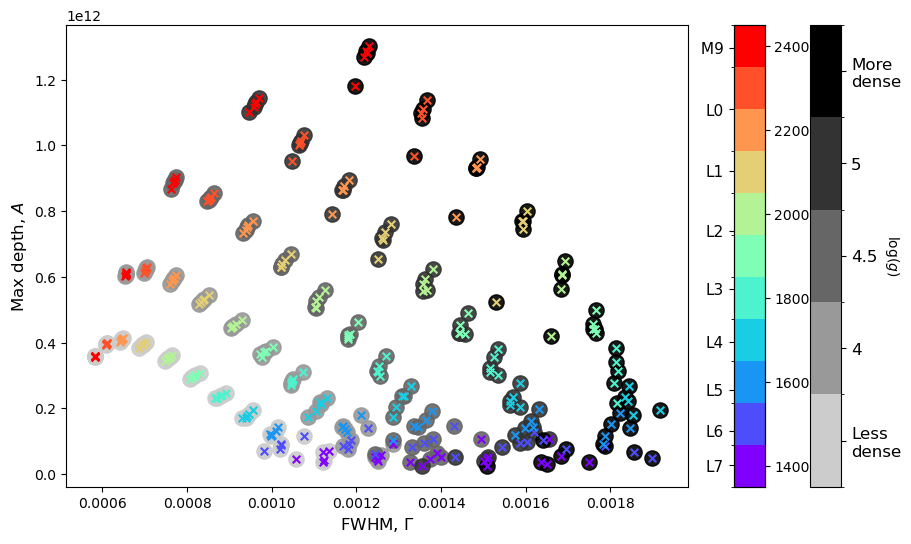

In [9]:
## large version of research note plot

#fig, ax = plt.subplots(constrained_layout=True, figsize = (10, 6))
fig = plt.figure(figsize = (10, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 0.05, 0.05])

ax = fig.add_subplot(gs[0, 0])
cax1, cax2 = fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2]) 

for g in gravities:
    mask = round(master_df['logg'], 1) == g
    mask = mask & (master_df['temp'] >= 1400) & (master_df['logg'] <= 2400)
    color = bw_cmap(norm_bw(g))
    
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               -(master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color, s=120, alpha = .9)
    

for temp in temps:
    mask = master_df['temp'] == temp
    # mask = mask & (master_df['logg'] >= 4) & (master_df['logg'] <= 5)
    #mask = mask & (master_df['clouds'] <= 3)
    color = rainbow(norm_temp(temp))
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
                - (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                    color = color, alpha = 1, s=30, marker = 'x')
        
        
ax.set_xlabel(r'FWHM, $Γ$', fontsize=12)
ax.set_ylabel(r'Max depth, $A$', fontsize=12)

temp_cb = temp_colorbar(fig, cax = cax1, pad = .02, aspect = 40, fontsize = 11)
#temp_cb.set_label('Temperature (K)', rotation = -90, labelpad=20)

bw_cb = logg_bw_colorbar(fig, cax = cax2, pad = .01)
bw_cb.set_label(r'$\log(g)$', fontsize=10, rotation = -90, labelpad=0) 

print(ax.get_ylim())

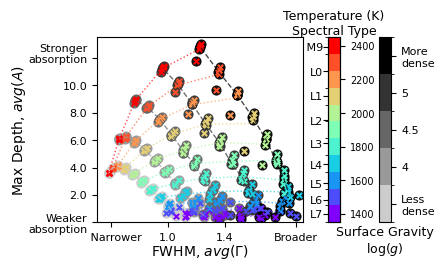

In [20]:
# small version of research note plot
ticks_font_size = 8
labels_font_size = 10

## size of the plot for research note
temperature_lines = True
gravity_lines = True

# starting plot
fig = plt.figure(figsize=(3.8, 2.4))
gs = fig.add_gridspec(1, 5, width_ratios=[1, 0.02, 0.06, 0.09, 0.06])

ax = fig.add_subplot(gs[0, 0])
cax1, cax2 = fig.add_subplot(gs[0, 2]), fig.add_subplot(gs[0, 4]) 


# plotting lines for temperatures
if temperature_lines == True:
    for temp in temps:
        avg_A = []
        max_A = []
        min_A = []
        avg_FWHM = []
        mask_temp = master_df['temp'] == temp
        color = rainbow(norm_temp(temp))
        for g in gravities:
            mask_grav = round(master_df['logg'], 1) == g
            mask = mask_temp & mask_grav
            avg_A.append(np.mean(master_df[mask]['A1'] + master_df[mask]['A2'])/2)
            max_A.append(np.max(-(master_df[mask]['A1'] + master_df[mask]['A2']))/2)
            min_A.append(np.min(-(master_df[mask]['A1'] + master_df[mask]['A2']))/2)
            avg_FWHM.append(np.mean(master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2)
        
        #ax.fill_between(avg_FWHM, min_A, max_A, alpha=0.2, color=color)
        ax.plot(avg_FWHM, -np.array(avg_A), color = color, lw = 1, alpha = .7, linestyle = 'dotted')

# plotting lines for gravity
if gravity_lines == True:
    for g in gravities:
        avg_A = []
        avg_FWHM = []
        color = bw_cmap(norm_bw(g))
        mask_grav = round(master_df['logg'], 1) == g
        for temp in temps:
            mask_temp = master_df['temp'] == temp
            mask = mask_temp & mask_grav
            avg_A.append(np.median(master_df[mask]['A1'] + master_df[mask]['A2'])/2)
            avg_FWHM.append(np.median(master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2)
        ax.plot(avg_FWHM, -np.array(avg_A), color = color, lw = 1, alpha = .7, linestyle = 'dashed')

        
# plotting black and white point for gravities        
for g in gravities:
    mask = round(master_df['logg'], 1) == g
    mask = mask & (master_df['temp'] >= 1400) & (master_df['logg'] <= 2400)
    color = bw_cmap(norm_bw(g))
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               -(master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color, s=40, alpha = .9)
    
# plotting colored points for temperatures
for temp in temps:
    mask = master_df['temp'] == temp
    color = rainbow(norm_temp(temp))
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
                - (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                    color = color, alpha = 1, s=15, marker = 'x')
        
        
# creating temperture colorbar
temp_cb = temp_colorbar(fig, cax = cax1, pad= 50, fontsize=ticks_font_size, shrink = 0.5)
temp_cb.ax.set_title('Temperature (K)\nSpectral Type', fontsize=9, pad= 2)
temp_cb.ax.tick_params(axis='both', which='major', pad=0, )


# creating logg colorbar
bw_cb = logg_bw_colorbar(fig, cax = cax2, pad= 100, fontsize=ticks_font_size)
bw_cb.ax.set_xticks([])
bw_cb.ax.set_xlabel("Surface Gravity\n"+ r'$\log(g)$', fontsize=9, labelpad=2) 

# set limits and ticks for the y axis
ax.set_ylim(-20, 13.5e11)
yticks = np.array([0, 2e11, 4e11, 6e11, 8e11, 10e11, 12e11])
ylabel = list(yticks.copy()/1e11)
ylabel[-1] = "Stronger\nabsorption\n"
ylabel[0] = "Weaker\nabsorption"
ax.set_yticks(yticks)
ax.set_yticklabels(ylabel, fontsize= ticks_font_size)


# set limits and ticks for the x axis
ax.set_xlim(0.5e-3, 1.95e-3)
xticks = np.array([0.6e-3, 1e-3, 1.4e-3, 1.9e-3])
xlabel = list(np.around(xticks.copy()/1e-3, 1))
xlabel[-1] = "Broader"
xlabel[0] = "   Narrower"
ax.set_xticks(xticks)
ax.set_xticklabels(xlabel, fontsize= ticks_font_size)


# set axis labels
ax.set_ylabel("Max Depth, $avg(A)$", fontsize=labels_font_size, labelpad=0)
ax.set_xlabel("FWHM, $avg(Γ)$", fontsize=labels_font_size, labelpad=0) 
 
# save the figure
fig.savefig('/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/plots/TempMap.pdf',  bbox_inches='tight', pad_inches=0.01)
# ax.set_title(r"$T_{eff} = 1600 \text{K}$", fontsize=12)

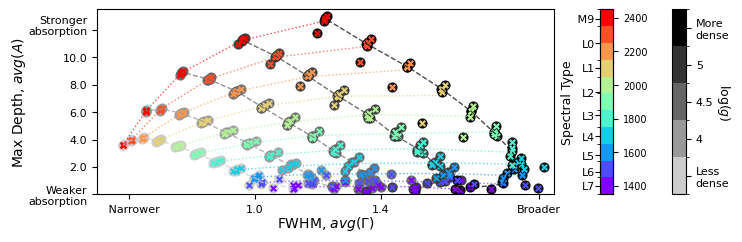

In [50]:
ticks_font_size = 8
labels_font_size = 10

## size of the plot for research note
temperature_lines = True
gravity_lines = True

# starting plot
fig = plt.figure(figsize=(7.6, 2.4))
gs = fig.add_gridspec(1, 5,width_ratios=[1, 0.01, 0.03, 0.04, 0.03])

ax = fig.add_subplot(gs[0, 0])
cax1, cax2 = fig.add_subplot(gs[0, 2]), fig.add_subplot(gs[0, 4]) 


# plotting lines for temperatures
if temperature_lines == True:
    for temp in temps:
        avg_A = []
        max_A = []
        min_A = []
        avg_FWHM = []
        mask_temp = master_df['temp'] == temp
        color = rainbow(norm_temp(temp))
        for g in gravities:
            mask_grav = round(master_df['logg'], 1) == g
            mask = mask_temp & mask_grav
            avg_A.append(np.mean(master_df[mask]['A1'] + master_df[mask]['A2'])/2)
            max_A.append(np.max(-(master_df[mask]['A1'] + master_df[mask]['A2']))/2)
            min_A.append(np.min(-(master_df[mask]['A1'] + master_df[mask]['A2']))/2)
            avg_FWHM.append(np.mean(master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2)
        
        #ax.fill_between(avg_FWHM, min_A, max_A, alpha=0.2, color=color)
        ax.plot(avg_FWHM, -np.array(avg_A), color = color, lw = 1, alpha = .7, linestyle = 'dotted')

# plotting lines for gravity
if gravity_lines == True:
    for g in gravities:
        avg_A = []
        avg_FWHM = []
        color = bw_cmap(norm_bw(g))
        mask_grav = round(master_df['logg'], 1) == g
        for temp in temps:
            mask_temp = master_df['temp'] == temp
            mask = mask_temp & mask_grav
            avg_A.append(np.median(master_df[mask]['A1'] + master_df[mask]['A2'])/2)
            avg_FWHM.append(np.median(master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2)
        ax.plot(avg_FWHM, -np.array(avg_A), color = color, lw = 1, alpha = .7, linestyle = 'dashed')

        
# plotting black and white point for gravities        
for g in gravities:
    mask = round(master_df['logg'], 1) == g
    mask = mask & (master_df['temp'] >= 1400) & (master_df['logg'] <= 2400)
    color = bw_cmap(norm_bw(g))
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               -(master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color, s=40, alpha = .9)
    
# plotting colored points for temperatures
for temp in temps:
    mask = master_df['temp'] == temp
    color = rainbow(norm_temp(temp))
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
                - (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                    color = color, alpha = 1, s=15, marker = 'x')
        
        
# creating temperture colorbar
temp_cb = temp_colorbar(fig, cax = cax1, pad= 50, fontsize=ticks_font_size, shrink = 0.5)
# temp_cb.ax.set_title('Temperature (K)\nSpectral Type', fontsize=9, pad= 2)
# temp_cb.ax.set_label('Temperature (K)\nSpectral Type') #, fontsize=9, pad= 2)
temp_cb.set_label('Spectral Type', labelpad=0, fontsize=9)
temp_cb.ax.tick_params(axis='both', which='major', pad=0)


# creating logg colorbar
bw_cb = logg_bw_colorbar(fig, cax = cax2, pad= 100, fontsize=ticks_font_size)
bw_cb.ax.set_xticks([])
bw_cb.set_label(r'$\log(g)$', fontsize=9, labelpad=2, rotation = -90) 

# set limits and ticks for the y axis
ax.set_ylim(-20, 13.5e11)
yticks = np.array([0, 2e11, 4e11, 6e11, 8e11, 10e11, 12e11])
ylabel = list(yticks.copy()/1e11)
ylabel[-1] = "Stronger\nabsorption\n"
ylabel[0] = "Weaker\nabsorption"
ax.set_yticks(yticks)
ax.set_yticklabels(ylabel, fontsize= ticks_font_size)


# set limits and ticks for the x axis
ax.set_xlim(0.5e-3, 1.95e-3)
xticks = np.array([0.6e-3, 1e-3, 1.4e-3, 1.9e-3])
xlabel = list(np.around(xticks.copy()/1e-3, 1))
xlabel[-1] = "Broader"
xlabel[0] = "   Narrower"
ax.set_xticks(xticks)
ax.set_xticklabels(xlabel, fontsize= ticks_font_size)


# set axis labels
ax.set_ylabel("Max Depth, $avg(A)$", fontsize=labels_font_size, labelpad=0)
ax.set_xlabel("FWHM, $avg(Γ)$", fontsize=labels_font_size, labelpad=0) 
 
# save the figure
fig.savefig('/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/plots/Wide_TempMap.pdf',  bbox_inches='tight', pad_inches=0.01)
# ax.set_title(r"$T_{eff} = 1600 \text{K}$", fontsize=12)

Text(0.5, 1.0, 'Temperature (K)\nSpectral Type')

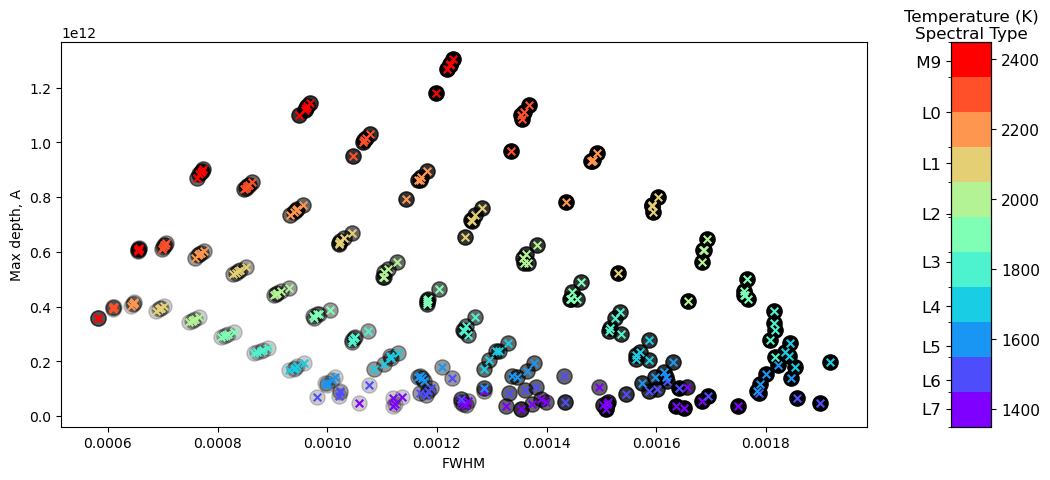

In [12]:
## Uses alpha to show the gravity of points

fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05])

ax = fig.add_subplot(gs[0, 0])
cax = fig.add_subplot(gs[0, 1])


for g in gravities:
    mask = round(master_df['logg'], 1) == g
    mask = mask & (master_df['temp'] >= 1400) & (master_df['logg'] <= 2400)
    color = bw_cmap(norm_bw(g))
    alpha = norm_bw(g) / 255
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               -(master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = 'k' , s=120, alpha = alpha)
    

for temp in temps:
    mask = master_df['temp'] == temp
    # mask = mask & (master_df['logg'] >= 4) & (master_df['logg'] <= 5)
    #mask = mask & (master_df['clouds'] <= 3)
    color = rainbow(norm_temp(temp))
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
                - (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                    color = color, alpha = 1, s=30, marker = 'x')
        
        
ax.set_xlabel('FWHM')
ax.set_ylabel('Max depth, A')

temp_cb = temp_colorbar(fig, cax = cax, pad = .01, aspect =1,shrink =1 )
temp_cb.ax.set_title('Temperature (K)\nSpectral Type', fontsize=12, pad= 2)

